# **Análise Preço Gasolina - Brasil**

O objetivo deste notebook é demonstrar e praticar a análise de dados utilizando o **Python** e suas ferramentas.

Utilizamos o **Pandas** para tratamento e análise dos dados, e o **Matplotlib** e **Seaborn** para criar visualizações.

O Dataset original utilizado neste notebook foi extraido do kaggle: https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil.
Ele foi dividido em dois arquivos CSV para demonstrar como podemos efetuar a união de dois datasets distintos.

In [1]:
# importação bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import datetime

import warnings
warnings.filterwarnings('ignore')

## **Preparação dos Dados**

In [2]:
df_2000 = pd.read_csv('gasolina_2000+.csv')
df_2000.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [3]:
df_2010 = pd.read_csv('gasolina_2010+.csv', dtype='unicode')
df_2010.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,9256,2011-01-02,2011-01-08,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,80,R$/l,2.03,0.003,2.02,2.05,0.411,0.001,1.619,0.013,1.6111,1.6411,0.008
1,9257,2011-01-02,2011-01-08,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,255,R$/l,1.717,0.102,1.49,1.99,0.225,0.059,1.492,0.069,1.3221,1.6201,0.046
2,9258,2011-01-02,2011-01-08,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,141,R$/l,1.848,0.148,1.59,2.49,0.326,0.08,1.522,0.105,1.2833,1.7486,0.069
3,9259,2011-01-02,2011-01-08,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,132,R$/l,1.893,0.108,1.699,2.199,0.191,0.057,1.702,0.04,1.5915,1.79,0.024
4,9260,2011-01-02,2011-01-08,NORDESTE,ALAGOAS,ETANOL HIDRATADO,97,R$/l,2.026,0.084,1.749,2.1,0.268,0.0409999999999999,1.758,0.042,1.63,1.848,0.024


### **Combinando os dois dataframes**

In [4]:
# Confirmando se os 2 dataframes possuem as mesmas variáveis:
np.unique((df_2000.columns == df_2010.columns), return_counts=True)

(array([ True]), array([19], dtype=int64))

In [5]:
# Unindo os dataframes
df_combinado = pd.concat([df_2000, df_2010])

In [6]:
df_combinado

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.35,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.76,0.419,0.07,0.97,0.095,0.5614,1.161,0.098
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.07,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.4,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78180,120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.51,4.69,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
78181,120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
78182,120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
78183,120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.19,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


### **Separando as variáveis que vamos estudar**

In [7]:
df_combinado.columns

Index(['Unnamed: 0', 'DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO',
       'PRODUTO', 'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'],
      dtype='object')

In [8]:
filtro = ['DATA FINAL', 'ESTADO', 'PRODUTO', 'PREÇO MÉDIO REVENDA']

In [9]:
df = df_combinado[filtro]

In [10]:
df.head()

,DATA FINAL,ESTADO,PRODUTO,PREÇO MÉDIO REVENDA
0,2004-05-15,DISTRITO FEDERAL,ETANOL HIDRATADO,1.288
1,2004-05-15,GOIAS,ETANOL HIDRATADO,1.162
2,2004-05-15,MATO GROSSO,ETANOL HIDRATADO,1.389
3,2004-05-15,MATO GROSSO DO SUL,ETANOL HIDRATADO,1.262
4,2004-05-15,ALAGOAS,ETANOL HIDRATADO,1.181


## **Efetuando o tratamento dos dados**

### **Verificando os tipos de dados das variáveis**

Neste momento vamos verificar se as variáveis estão com os seus tipos de dados corretamente aplicados.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120823 entries, 0 to 78184
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATA FINAL           120823 non-null  object
 1   ESTADO               120823 non-null  object
 2   PRODUTO              120823 non-null  object
 3   PREÇO MÉDIO REVENDA  120823 non-null  object
dtypes: object(4)
memory usage: 4.6+ MB


Acima verificamos que precisamos fazer alguns ajustes nos dados:

* DATA FINAL - Transformar em Datetime
* A colunas de Preço devera sofrer alteração para tipo numérico.

In [12]:
#DATA FINAL para Datetime
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'])

In [13]:
#Convertendo demais colunas para formato numérico
df['PREÇO MÉDIO REVENDA'] = pd.to_numeric(df['PREÇO MÉDIO REVENDA'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120823 entries, 0 to 78184
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATA FINAL           120823 non-null  datetime64[ns]
 1   ESTADO               120823 non-null  object        
 2   PRODUTO              120823 non-null  object        
 3   PREÇO MÉDIO REVENDA  120823 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.6+ MB


### **Verificação de Dados Ausentes**

In [15]:
df.isna().sum()

DATA FINAL             0
ESTADO                 0
PRODUTO                0
PREÇO MÉDIO REVENDA    0
dtype: int64

Nossos campos selecionados não possuem dados ausentes.

## **Análise Exploratória**

In [16]:
df.head()

,DATA FINAL,ESTADO,PRODUTO,PREÇO MÉDIO REVENDA
0,2004-05-15,DISTRITO FEDERAL,ETANOL HIDRATADO,1.288
1,2004-05-15,GOIAS,ETANOL HIDRATADO,1.162
2,2004-05-15,MATO GROSSO,ETANOL HIDRATADO,1.389
3,2004-05-15,MATO GROSSO DO SUL,ETANOL HIDRATADO,1.262
4,2004-05-15,ALAGOAS,ETANOL HIDRATADO,1.181


In [17]:
df['PRODUTO'].value_counts()

GASOLINA COMUM        23570
GLP                   23561
ETANOL HIDRATADO      23440
ÓLEO DIESEL           21194
GNV                   14469
ÓLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: PRODUTO, dtype: int64

Vimos acima que existem o mesmo produto com nomenclatura diferente. Vamos corrigi-los.


In [18]:
df['PRODUTO'] = df['PRODUTO'].str.replace('OLEO DIESEL S10', 'ÓLEO DIESEL S10' )
df['PRODUTO'] = df['PRODUTO'].str.replace('OLEO DIESEL', 'ÓLEO DIESEL' )

In [19]:
df['PRODUTO'].value_counts()

GASOLINA COMUM        23570
GLP                   23561
ÓLEO DIESEL           23545
ETANOL HIDRATADO      23440
GNV                   14469
ÓLEO DIESEL S10       11489
GASOLINA ADITIVADA      749
Name: PRODUTO, dtype: int64

In [20]:
df.describe()

,PREÇO MÉDIO REVENDA
count,120823.000000
mean,11.473440
std,19.161823
min,0.766000
25%,2.157000
50%,2.899000
75%,4.026000
max,107.500000


In [21]:
df_gasolina_comum = df.query('PRODUTO == "GASOLINA COMUM"')

In [22]:
df_gasolina_comum['ano'] = df_gasolina_comum['DATA FINAL'].dt.year
df_gasolina_comum['mes'] = df_gasolina_comum['DATA FINAL'].dt.month

## **Criando Visualizações**

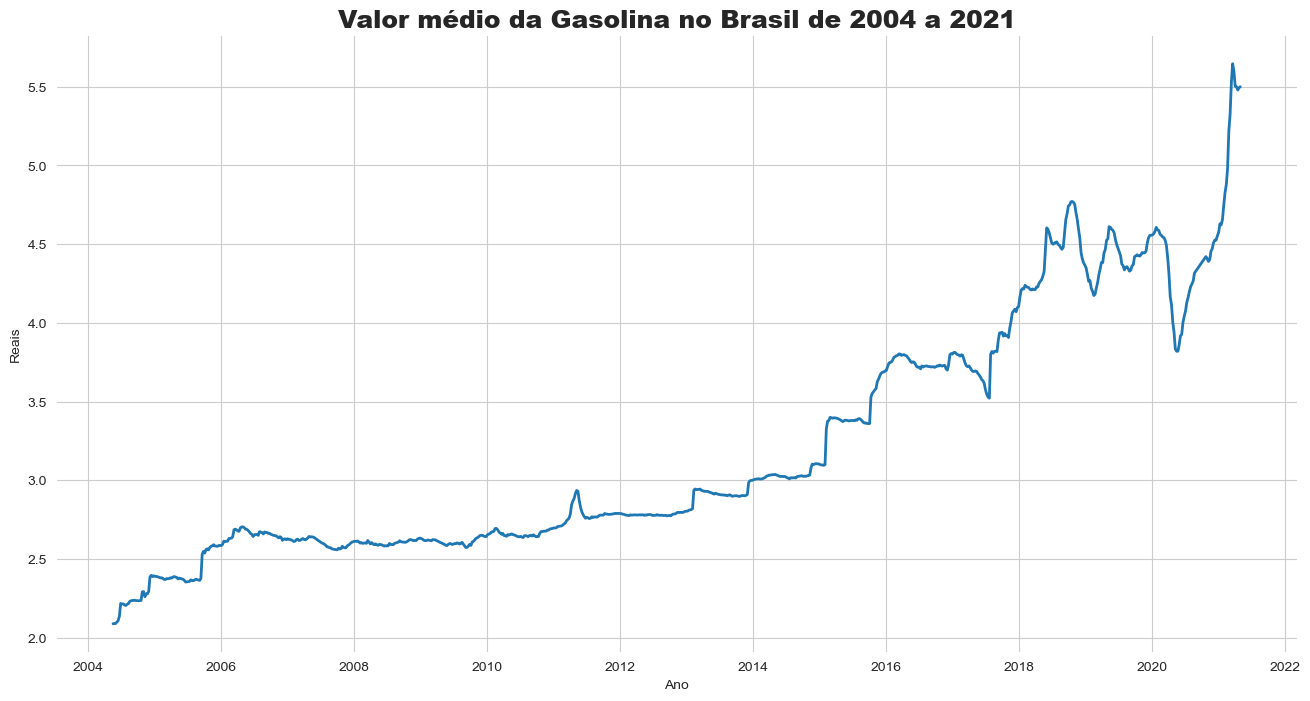

In [23]:
sns.set_style('whitegrid')
ax, fig = plt.subplots(figsize=(16,8))

ax = sns.lineplot(data = df_gasolina_comum.groupby('DATA FINAL')['PREÇO MÉDIO REVENDA'].mean(),linewidth=2)
plt.title('Valor médio da Gasolina no Brasil de 2004 a 2021', fontsize=18, weight='black')
ax.set(ylabel='Reais', xlabel='Ano')
sns.despine(bottom=True, left=True)

plt.show()

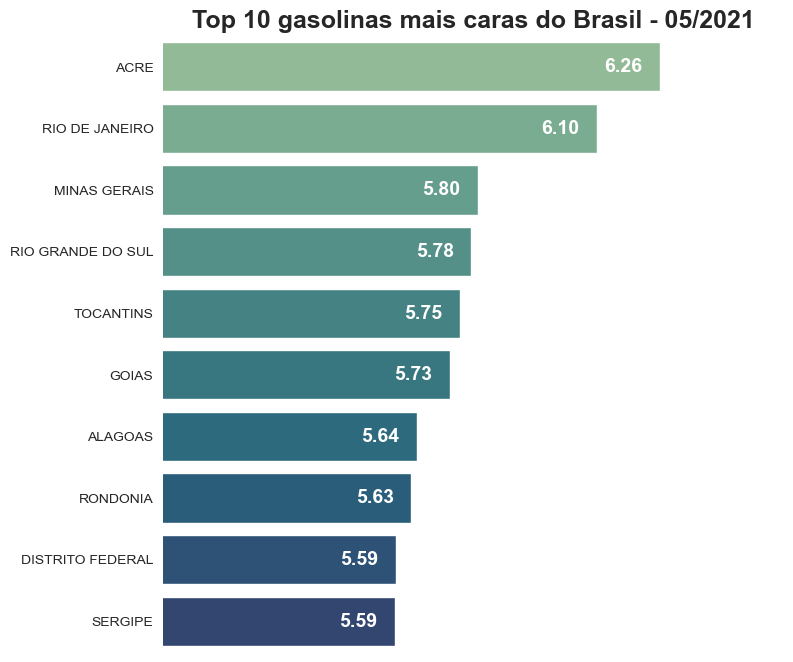

In [31]:
sns.set_style('white')
sns.color_palette("Paired")

ax, fig = plt.subplots(figsize=(8,8))
ax = sns.barplot(data=df_gasolina_comum.query('ano == 2021 & mes ==5').sort_values(by='PREÇO MÉDIO REVENDA', ascending=False).head(10), 
                 y='ESTADO', x='PREÇO MÉDIO REVENDA',palette='crest')
plt.bar_label(ax.containers[0], padding=-40, label_type='edge',fmt='%.2f', fontsize=14, color='white', weight='bold' )
plt.title('Top 10 gasolinas mais caras do Brasil - 05/2021', fontsize=18, weight='bold')
ax.set(xlabel='',ylabel='',xticklabels='', xlim=5)
sns.despine(bottom=True, left=True)

plt.show()

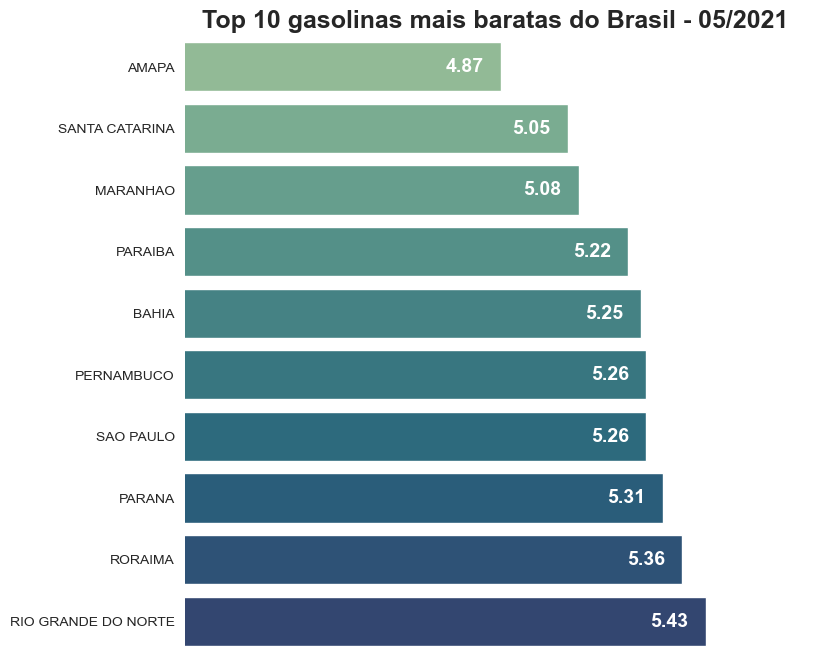

In [30]:
sns.set_style('white')

sns.color_palette("Paired")
ax, fig = plt.subplots(figsize=(8,8))
ax = sns.barplot(data=df_gasolina_comum.query('ano == 2021 & mes ==5').sort_values(by='PREÇO MÉDIO REVENDA', ascending=True).head(10), 
                 y='ESTADO', x='PREÇO MÉDIO REVENDA',palette='crest')
plt.bar_label(ax.containers[0], padding=-40, label_type='edge',fmt='%.2f', fontsize=14, color='white', weight='bold')
plt.title('Top 10 gasolinas mais baratas do Brasil - 05/2021', fontsize=18, weight='bold')

ax.set(xlabel='',ylabel='',xticklabels='', xlim=4)
sns.despine(bottom=True, left=True)

plt.show()